# Proyecto de inteligencia artificial: Resumen automatico de articulos web 

### Equipo 2:

### Alvarez Uriel  16111783
### Velarde Maira 16111829

En el proyecto se busco la elaboracion de resumenes de paginas web.

El resumen de texto en Machine Learning se refiere a la acortacion de textos grandes.

Lo que se busco fue crear un resumen coherente y fluido teniendo solo los puntos principales resaltados en el documento.

Cuales son los principales enfoques para el resumen automatico?
Hay dos tipos principales de cómo resumir texto en PLN:

##### Resumen basado en extraccion
El resumen de texto en Machine Learning extractivo implica extraer frases clave del documento de origen y combinarlas para hacer un resumen. La extraccion se realiza de acuerdo con la metrica definida sin realizar ningun cambio en los textos.

Ejemplo:

Texto fuente: Jose y Maria cabalgaron en un burro para asistir el evento anual en Jerusalen. En la ciudad, Maria dio nacimiento a un niño llamado Jesus .

Resumen de extracción: Jose y Maria asistir evento Jerusalen. Maria nacimiento Jesus.

##### Resumen basado en la abstraccion
La tecnica de abstraccion implica parafrasear y acortar partes del documento original. Cuando la abstraccion se aplica para la sintesis de texto en problemas de deep learning, puede superar las inconsistencias gramaticales del metodo extractivo.

Los algoritmos de resumen de texto abstracto crean nuevas frases y oraciones que transmiten la informacion mas util del texto original, al igual que los humanos.

Ejemplo:

Resumen abstracto: Jose y Maria asistieron a Jerusalen, donde nacio Jesus.

### Iniciamos importando librerias y extrayendo el articulo de la pagina web.

Urllib.request define funciones y clases que ayudan a abrir URL (principalmente HTTP) en un mundo complejo

Una expresión regular (o RE) especifica un conjunto de cadenas que coinciden; Las funciones en este módulo le permiten verificar si una cadena particular coincide con una expresión regular dada (o si una expresión regular dada coincide con una cadena particular, que se reduce a lo mismo).

In [1]:
# Importamos Librerias
import bs4 as bs # bs es una libreria llamada Beautiful Soup 
import urllib.request  
import re
import nltk

# Se lee el articulo de la pagina web
response = urllib.request.urlopen('https://es.wikipedia.org/wiki/SpaceX')  
articulo = response.read()

### Se analiza el texto o bien se extraen los datos con Beautiful Soup

Beautiful Soup es una biblioteca de Python para extraer datos de archivos HTML y XML. Funciona con su analizador favorito para proporcionar formas idiomáticas de navegar, buscar y modificar el árbol de análisis.

### Se busca cada parrafo en el articulo web para posteriormente identificarlos.

In [2]:
# Se analiza el texto con el analizador lxml
analizando_texto = bs.BeautifulSoup(articulo,'lxml')

# Aqui se navega para la estructura y encuentre cada parrafo
parrafos = analizando_texto.find_all('p')

texto_articulo = ""

for p in parrafos:  
    texto_articulo += p.text

### Eliminacion de corchetes y espacios extra

Se procede a realizar la eliminacion de los corchetes y los espacios extra. Tales como referencias con numeros.

In [3]:
# Eliminar corchetes y espacios extra
texto_articulo = re.sub(r'\[[0-9]*\]', ' ', texto_articulo)  
texto_articulo = re.sub(r'\s+', ' ', texto_articulo)  

### Se eliminan los caracteres especiales y digitos no necesarios para resumir la informacion. Tales como X^3, X^2, etc.

In [4]:
# Eliminar caracteres especiales y dígitos
formato_texto_articulo = re.sub('[^a-zA-Z]', ' ', texto_articulo)  
formato_texto_articulo = re.sub(r'\s+', ' ',formato_texto_articulo)  

### Tokenizacion del articulo

Usaremos el texto_articulo para convertir todo el articulo en frases. Ya que ese formato cuenta con puntos y comas que se utilizan como referencia para hacer paradas porque el formato_texto_articulo ya no contiene ningun signo de puntuacion.

In [5]:
lista_frases = nltk.sent_tokenize(texto_articulo)

### Se realiza un conteo de la s palabras que aparecen con frecuencia en el articulo.

Corpus: Una colección de datos lingüísticos, ya sea compilados como textos escritos o como una transcripción de habla grabada. El propósito principal de un corpus es verificar una hipótesis sobre lenguaje.

In [6]:
#Obtenemos un conjunto de palabras en inglés usando la línea
stopwords = nltk.corpus.stopwords.words('english')

palabra_frecuente = {}  
for palabra in nltk.word_tokenize(formato_texto_articulo):  
    if palabra not in stopwords:
        if palabra not in palabra_frecuente.keys():
            palabra_frecuente[palabra] = 1
        else:
            palabra_frecuente[palabra] += 1

freq = nltk.FreqDist(palabra_frecuente)
for key, val in freq.items():
    print(str(key) + ':' + str(val))

Space:1
Exploration:1
Technologies:1
Corp:1
cuyo:1
nombre:2
comercial:2
es:16
SpaceX:61
una:50
empresa:6
estadounidense:2
de:385
transporte:4
aeroespacial:3
fundada:1
en:126
por:29
Elon:12
Musk:24
quien:2
tambi:7
n:110
cofundador:1
PayPal:1
CEO:1
presidente:1
Tesla:2
Motors:1
SolarCity:1
Hyperloop:1
The:3
Boring:1
Company:1
Neuralink:1
OpenAI:1
Realiz:1
su:26
primer:6
lanzamiento:35
tripulado:2
el:125
mayo:3
cohete:13
Falcon:37
la:143
c:11
psula:10
Crew:1
Dragon:18
manera:1
exitosa:1
colocando:2
rbita:12
los:52
astronautas:4
Doug:1
Hurley:1
Bob:1
Behnken:1
posteriormente:1
estaci:2
espacial:9
internacional:2
Ha:2
desarrollado:4
cohetes:10
Heavy:9
cuales:4
han:3
sido:4
construidos:1
con:35
meta:1
ser:13
veh:15
culos:5
reutilizables:2
ha:10
nave:7
que:90
fue:6
puesta:1
se:37
encuentran:1
desarrollando:2
BFR:1
Star:1
Ship:1
cual:4
planea:1
usar:2
para:52
enviar:4
colonias:2
humanos:3
futuras:2
misiones:8
Marte:16
dise:6
prueba:4
fabrica:1
mayor:2
parte:7
componentes:3
cuenta:4
propia:2
in

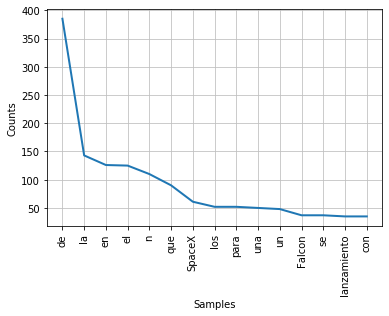

In [7]:
# Aqui graficamos las mas frecuentes.
freq.plot(15, cumulative=False)

### Encontrar la frecuencia ponderada de ocurrencia.

A continuación, necesitamos encontrar la frecuencia ponderada de las ocurrencias de todas las palabras. Podemos encontrar la frecuencia ponderada de cada palabra al dividir su frecuencia por la frecuencia de la palabra que aparece con mayor frecuencia. 

El siguiente output contiene las frecuencias ponderadas para cada palabra:

In [8]:
frecuencia_maxima = max(palabra_frecuente.values())

for palabra in palabra_frecuente.keys():  
    palabra_frecuente[palabra] = (palabra_frecuente[palabra]/frecuencia_maxima)
    
print(palabra_frecuente,palabra_frecuente[palabra])


{'Space': 0.0025974025974025974, 'Exploration': 0.0025974025974025974, 'Technologies': 0.0025974025974025974, 'Corp': 0.0025974025974025974, 'cuyo': 0.0025974025974025974, 'nombre': 0.005194805194805195, 'comercial': 0.005194805194805195, 'es': 0.04155844155844156, 'SpaceX': 0.15844155844155844, 'una': 0.12987012987012986, 'empresa': 0.015584415584415584, 'estadounidense': 0.005194805194805195, 'de': 1.0, 'transporte': 0.01038961038961039, 'aeroespacial': 0.007792207792207792, 'fundada': 0.0025974025974025974, 'en': 0.32727272727272727, 'por': 0.07532467532467532, 'Elon': 0.03116883116883117, 'Musk': 0.06233766233766234, 'quien': 0.005194805194805195, 'tambi': 0.01818181818181818, 'n': 0.2857142857142857, 'cofundador': 0.0025974025974025974, 'PayPal': 0.0025974025974025974, 'CEO': 0.0025974025974025974, 'presidente': 0.0025974025974025974, 'Tesla': 0.005194805194805195, 'Motors': 0.0025974025974025974, 'SolarCity': 0.0025974025974025974, 'Hyperloop': 0.0025974025974025974, 'The': 0.007

### Calcular los puntuajes de las oraciones sumando la frecuencia ponderada de cada palabra de la oracion.

In [9]:
# Se crea un diccionario vacio
puntuacion_frases = {}  
# Se realiza un bucle para tokenizar la oracion en palabras
for sent in lista_frases :  
    for palabra in nltk.word_tokenize(sent.lower()):
        # Se comprueba si la palabra se encuentra dentro de la lista de la palabra frecuente
        if palabra in  palabra_frecuente.keys(): 
            if len(sent.split(' ')) < 20: # se pone un espacio cuando la palabra es menor a una puntuacion de 20 (sumatoria de la oracion con palabras ponderadas)
                if sent not in puntuacion_frases.keys():
                    puntuacion_frases[sent] = palabra_frecuente[palabra]
                else:
                    puntuacion_frases[sent] += palabra_frecuente[palabra]
print(puntuacion_frases)

{'\u200b Originalmente con base en El Segundo, California, SpaceX ahora opera en las afueras de Hawthorne, California.': 2.161038961038961, '\u200b A principios de 2002 Musk comenzó a buscar empleados para su nueva compañía que pronto se llamaría SpaceX.': 1.5610389610389608, '\u200b Las primeras oficinas de SpaceX estaban situadas en un almacén en El Segundo, California.': 2.187012987012987, '\u200b \u200b A fecha de abril de 2017 la compañía tenía alrededor de 6000 empleados.': 3.4077922077922076, '\u200b En 2010 sus cálculos le convencieron de que la colonización de Marte era posible.': 2.9714285714285715, 'y cápsulas espaciales para transportar humanos a Marte y volver a la Tierra.': 0.5376623376623377, '\u200b En enero de 2019, la empresa anunció el despido del 10% de sus 6.000 empleados.': 3.150649350649351, 'Después de completar su función, la primera fase del cohete se separó de la segunda como es habitual.': 3.1584415584415577, 'Anteriormente la densificación de combustible so

### Obtencion del resumen

Para la obtencion del resumen se utiliza la libreria:
heapq que proporciona una implementación del algoritmo de cola de almacenamiento dinámico, también conocido como algoritmo de cola de prioridad.

nlargest: Devuelve una lista con los n elementos más grandes del conjunto de datos definidos por iterable 

Asi obteniendo el resumen de la siguiente manera:

In [10]:
import heapq  
sumatoria_frases = heapq.nlargest(20, puntuacion_frases, key=puntuacion_frases.get)

sumatoria = ' '.join(sumatoria_frases)  
print(sumatoria) 

SpaceX anunció sus planes de adherirse a los programas comerciales de vuelos tripulados para el final de la década. ​ ​ A fecha de abril de 2017 la compañía tenía alrededor de 6000 empleados. Después de completar su función, la primera fase del cohete se separó de la segunda como es habitual. ​ En enero de 2019, la empresa anunció el despido del 10% de sus 6.000 empleados. ​ ​ La carga, el Amos-6 de Spacecom valorado en 200 millones de dólares, fue destruida. ​ En 2010 sus cálculos le convencieron de que la colonización de Marte era posible. El 6 de febrero de 2018 se realizó el primer lanzamiento exitoso del Falcon Heavy. El cohete sería más potente que previamente lanzado públicamente, con más de 1.000.000 lbf (4.400 kN) de empuje. En abril de 2016, SpaceX anunció su plan de lanzar una plataforma Dragon modificada a Marte para 2018. Este proyecto es parte de un contrato de asociación público-privado entre la NASA y SpaceX. Las pruebas de nivel de componentes del motor Raptor comenzar

### Exportar el resumen a un archivo en Word

Para ello se debe de contar con la libreria DOCX que se puede instalar facilmente con el comando "conda install -c conda-forge python-docx" en la ventana Anaconda Prompt

Una vez hecho esto, se importa la libreria.
Despues se comienza a exportar el documento como se muestra en el codigo siguiente:

In [11]:
import docx
doc = docx.Document()
doc.add_heading('SPACE X', 0)
doc.add_picture('x.jpg', width=docx.shared.Inches(2), height=docx.shared.Cm(3))
doc.add_paragraph(sumatoria)
doc.save('SpaceX.docx')

Quedando el documento de la siguiente manera:

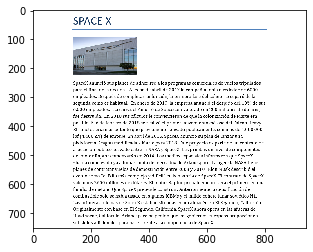

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imagen1 = mpimg.imread('spx.png')
imgplot = plt.imshow(imagen1)
plt.show()